# Лабораторная работа #3
### Толстых Мария, Шевченко Дарья P3230
### Вариант 4

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import scipy
from scipy.stats import chi2
from scipy.stats import norm
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

data = pd.read_csv('/content/sample_data/fifa_players_stats.csv')
data

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


# Задание 1. Проверяем согласованность Overall с нормальным законом

С помощью критерия согласия Пирсона хи-квадрат проверить согласованность рейтинг футболиста с нормальным законом (формализовать основные и альтернативные гипотезы, реализовать самостоятельно). Ту же самую задачу решить с помощью другого критерия (тоже формализовать гипотезы, но здесь можно воспользоваться готовой реализацией)


Критерий согласия Пирсона хи-квадрат используют для проверки гипотез о том что данные согласуются с некоторым законом.
Гипотезы:

$H_0$ = {рейтинг соответствует нормальному закону распределения}

$H_1 $ = {рейтинг не соответствует нормальному закону }

Количество интервалов k = 7.

Уровень значимости $\epsilon$ = 0.05. По таблице распределения $\chi^2_7$ найдём С. Согласно которому будем определять какую гипотезу принимает критерий $\delta(\vec{X})$
$$\sum\frac{(v_{j}-np_j)^2}{np_j}$$

Число интервалов k выбирают так, чтобы значения np1 = . . . = npk
были не менее 5—6.
Критерий согласия «работает» по принципу: если для данной выборки
функция отклонения велика по абсолютному значению, то это свидетельствует в пользу альтернативы, и наоборот.

In [ ]:
# Оценка параметров нормального распределения по данным
mean_value = np.mean(data['Overall'])
dev = np.std(data['Overall'])
print(f"Мат. ожидание: {mean_value} Дисперсия: {dev}")
n=len(data)

#Количество интервалов
k = 7

# Разделение значений на интервалы
hist, bins = np.histogram(data['Overall'], bins=k)

#Теоретическая вероятность
np_i = [len(data) * (norm.cdf(bins[i + 1], loc=mean_value, scale=dev) - norm.cdf(bins[i], loc=mean_value, scale=dev)) for i in range(k)]
# Наблюдаемые частоты
v_i = hist

# Рассчет статистики хи-квадрат
chi_stat = np.sum((v_i - np_i) ** 2 / np_i)
print(f"Статистика критерия : {chi_stat}")

# Степени свободы
df = len(bins) - 3
epsilon = 0.05
c = chi2.ppf(1-epsilon, df-1)
print(f"Критическая точка: {c}, степень свободы - {df}, уровень значимости - {epsilon}")


if chi_stat < c:
  print("Распределение соответствует нормальному закону, не отвергаем основную гипотезу")
else:
  print("Распределение не соответствует нормальному закону, отвергаем основную гипотезу")

Мат. ожидание: 65.85204164194401 Дисперсия: 6.788169596105948
Статистика критерия : 308.4506802965328
Критическая точка: 9.487729036781154, степень свободы - 5, уровень значимости - 0.05
Распределение не соответствует нормальному закону, отвергаем основную гипотезу


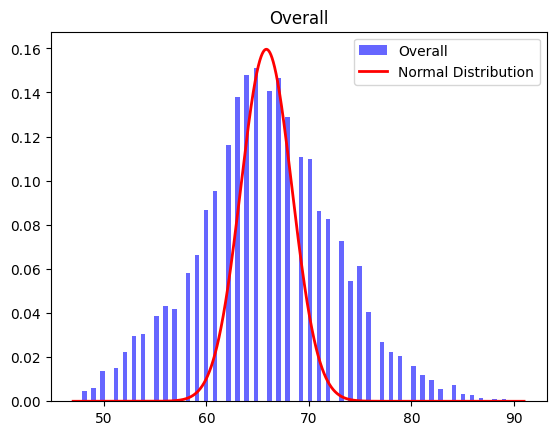

In [ ]:
#Создаем гистограмму и накладываем ее на плотность распределения
def plot_bins(data, title, std=None):
    plt.hist(data, bins=100, density=True, alpha=0.6, color='b', label=title)
    x = np.linspace(min(data), max(data), 10000)
    if std != None:
        plt.plot(x, norm.pdf(x, data.mean(), std), 'r-', lw=2, label='Normal Distribution')
    plt.title(title)
    plt.legend()
    plt.show()

plot_bins(data['Overall'], "Overall", 2.5)

Как видно по графику, распределены они не по нормальному закону. Решим задачу с помощью критерия Шапиро-Уилла. Нулевая гипотеза $H_0$ в этом случае: выборка распределена нормально. Критерий Шапиро-Уилла является наиболее эффективным критерием проверки гипотезы о принадлежности выборки к нормальному закону распределения

In [ ]:
from scipy.stats import shapiro

shapiro(data['Overall'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9953895211219788, pvalue=1.3840211172417113e-23)

pvalue < 0.05, следовательно $H_0$ отвергаем, распределение не соответствует нормальному закону

# Задание 2
С помощью критерия однородности хи-квадрат проверить однородность рейтинга молодых и возрастных футболистов (порог возраста выбирайте сами, формализовать Но и Н1, реализовать самостоятельно). Ту же самую задачу решить с помощью другого критерия (тоже формализовать гипотезы, но здесь можно воспользоваться готовой реализацией).



Критерий Стьюдента при двусторонней альтернативы:

$\delta({X}, {Y}) =
\begin{cases}
  H_0, если \ |\rho({X}, {Y})| < C\\
  H_1, если \ |\rho({X}, {Y})| \ge C, \\
\end{cases}$
где число $C = \tau_{1-\epsilon/2} $ - квантиль распределения $T_{n+m-2}$

Гипотезы для критерия Стьюдента:

Нулевая гипотеза $H_0$: Средние значения рейтинга у молодых и возрастных равны. $ \mu_{молодых} = \mu_{возрастных} $ \\
Альтернативная гипотеза $H_1$: Средние значения рейтинга у молодых и возрастных не равны.  $ \\ \mu_{молодых} ≠ \mu_{возрастных} $

𝑡--статистика для проверки нулевой гипотезы $$t_{n+m-2} = \sqrt{\frac{nm}{n+m} } \frac{𝑋_1 − 𝑋_2}{\sqrt{\frac{(n-1)(s_0^2(X_1))+(m-1)(s_0^2(X_2))}{n+m-2} }} $$
- $𝑋_1$ и $𝑋_2$  - выборочные средние для двух выборок,
- $S_0$ - объединенное стандартное отклонение (объединенная выборочная дисперсия),
- $𝑛$ и $m$ - размеры выборок для двух групп.


t-статистика чаще всего используется для проверки гипотез о разнице между средними двух выборок.

Для проверки гипотезы о равенстве дисперсий сначала используем критерий Фишера. Мы вычислим дисперсионное отношение $\frac{S_0^2({X_1})}{S_0^2({X_2})}$ и сравним его с критическим значением $C$ таблицы распределения Фишера. Если дисперсионное отношение меньше критического значения, то мы не можем отвергнуть гипотезу о равенстве дисперсий.

После того, как мы убедимся в равенстве дисперсий, мы сможем перейти к вычислению статистики Стьюдента для дальнейшего анализа данных.

Если дисперсии не равны, то решаем хи-квадратом



Обозначим через $p_j$ теоретические вероятности для каждой категории признака при условии истинности H0: «распределения совокупностей не различаются». Составим статистику:

$$\sum\sum\frac{(n_{ij}-n_ip_j)^2}{n_ip_j}$$
которая характеризует сумму квадратов отклонений наблюдаемых значений $n_{ij}$
от ожидаемых $n_i$$p_j$по всем категориям по обеим выборкам. В соответствии с теоремой Пирсона, при истинности H0 данная статистика стремится к распределению $χ^2$ с v = 2(m - 1) числом степеней свободы. Поскольку вероятности $p_j$ неизвестны, заменим их оценками, вычисленными при условии истинности H0: $p_j^*$ =$\frac{v_j}{𝑛}$, где $v_j =\frac{1}{n}\sum n_{ij}$ n = n1 + n2. Соответственно, получим статистику:

$$χ^2 = n_1n_2\sum(\frac{n_{1j}}{n_1}-\frac{n_{2j}}{n_2})^2\frac{1}{n_{1j}+n_{2j}}$$

Заметим, что число оцениваемых неизвестных параметров равно m - 1, поскольку оценки связаны соотношением $p_1^*$ + ⋯ $p_m^*$ = 1. Тогда, в соответствии с теоремой Пирсона для сложной гипотезы, при истинности H0 данная статистика стремится к распределению $χ^2$
с числом степеней свободы v = 2(m - 1) - (m - 1) = m - 1.
Возьмем в качестве критической точки $χ^2_{кр}$ квантиль распределения Хи квадрат уровня 1-α с m - 1 степенью свободы. Тогда, если $χ^2_{набл}$<$χ^2_{кр}$,то принимается гипотеза H0 об однородности двух распределений, в противном случае различие распределений признается значимым.
Возьмем в качестве критической точки квантиль распределения хи-квадрат уровня 1 -a c m-1 степенью свободы.

In [ ]:
from scipy.stats import t, f

# Выделение выборок рейтинга для молодых и возрастных
old = data[data['Age'] > 30]['Overall']
young = data[data['Age'] <= 30]['Overall']

# Вычисление средних значений для выборок
mean_old = old.mean()
mean_young = young.mean()

# Вычисление объединенной выборочной дисперсии
n = len(old)
m = len(young)

def disp(x, x_mean):
  s = sum((x_i - x_mean)**2 for x_i in x)
  return s/(len(x) - 1)

# Вычисление выборочных дисперсий для выборок
var_old = disp(old, mean_old)
var_young = disp(young, mean_young)
crit_value = f.ppf(1-0.05, n, m)
if (var_young/var_old < crit_value):
  print("Нет оснований отрицать гипотезу равенства дисперсий")
else:
  print("Гипотеза равенства дисперсий не верна. Далее нет смысла рассматривать критерий однородности. Используем хи-квадрат")


#Количество интервалов
k = 7

# Разделение значений на интервалы
hist1, bins1 = np.histogram(old, bins=k)
hist2, bins2 = np.histogram(young, bins=k)

#Теоретическая вероятность
np_i1 = [n * (norm.cdf(bins1[i + 1], loc=mean_old, scale=dev) - norm.cdf(bins1[i], loc=mean_old, scale=dev)) for i in range(k)]

np_i2 = [m * (norm.cdf(bins2[i + 1], loc=mean_young, scale=dev) - norm.cdf(bins2[i], loc=mean_young, scale=dev)) for i in range(k)]


# Рассчет статистики хи-квадрат
chi_stat = n * m * np.sum(((np.array(np_i1) / n) - (np.array(np_i2) / m)) ** 2) / np.sum((np_i1 + np_i2))

print(f"Статистика критерия : {chi_stat}")

# Степени свободы
df = k - 1
epsilon = 0.05
c = chi2.ppf(1-epsilon, df)
print(f"Критическая точка: {c}, степень свободы - {df}, уровень значимости - {epsilon}")


if chi_stat > c:
   print("Отвергаем нулевую гипотезу о равенстве средних, что подтверждает наличие различий между средними значениями рейтинга у молодых и возрастных.")
else:
    print("Принимаем нулевую гипотезу о равенстве средних, что может указывать на отсутствие различий между средними значениями рейтинга у молодых и возрастных.")

Гипотеза равенства дисперсий не верна. Далее нет смысла рассматривать критерий однородности. Используем хи-квадрат
Статистика критерия : 58.878280958938284
Критическая точка: 12.591587243743977, степень свободы - 6, уровень значимости - 0.05
Отвергаем нулевую гипотезу о равенстве средних, что подтверждает наличие различий между средними значениями рейтинга у молодых и возрастных.


In [ ]:
from scipy.stats import t, f
from scipy.stats import mannwhitneyu

t_statistic, p_value = mannwhitneyu(old, young, alternative='two-sided')
# Проверка гипотез по Манна-Уитни
if p_value > epsilon:
    print("Принимаем гипотезу H_0 о равенстве средних.")
else:
    print("Принимаем гипотезу H_1 о неравенстве средних.")

Принимаем гипотезу H_1 о неравенстве средних.


In [ ]:
young = data[data['Age'] <= 30]
young

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23
10,H. Kane,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,...,86,84,86,69,71,69,66,64,66,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [ ]:
old = data[data['Age'] > 30]
old

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,Wu Fei,Fei Wu,51,51,30000,GK,GK,China PR,https://cdn.sofifa.net/players/269/546/23_60.png,32,...,19,21,19,19,21,19,19,21,19,51
18302,Gou Junchen,Junchen Gou,51,51,40000,CB,CB,China PR,https://cdn.sofifa.net/players/269/483/23_60.png,32,...,38,38,38,47,47,47,49,51,49,17
18407,Wang Hanlin,Hanlin Wang,50,50,30000,CDM,CDM,China PR,https://cdn.sofifa.net/players/269/482/23_60.png,32,...,48,49,48,50,50,50,50,50,50,15
18466,Huo Liang,Liang Huo,49,49,30000,RB,RB,China PR,https://cdn.sofifa.net/players/269/519/23_60.png,32,...,41,37,41,47,43,47,49,49,49,16


In [ ]:
from scipy.stats import anderson_ksamp, ks_2samp

anderson_ksamps = []
ks_2samps = []

for i in range(1000):
    s1 = young['Overall'].sample(900)
    s2 = old['Overall'].sample(900)
    anderson_ksamps.append(anderson_ksamp([s1, s2]).pvalue)
    ks_2samps.append(ks_2samp(s1, s2).pvalue)

anderson_ksamps = np.array(anderson_ksamps)
ks_2samps = np.array(ks_2samps)

<ipython-input-144-af2216996708>:9: UserWarning: p-value floored: true value smaller than 0.001
  anderson_ksamps.append(anderson_ksamp([s1, s2]).pvalue)


Андерсон-Дарлинг:

In [ ]:
anderson_ksamps.mean()

0.0010000000000000005

Колмогорова-Смирнова:

In [ ]:
ks_2samps.mean()

1.4399546120131825e-18

В обоих случаях pvalue < 0.05, следовательно нулевая гипотеза о их однородности (схожести распределений и вариативности) отвергается. Это также видно из следующих графиков:

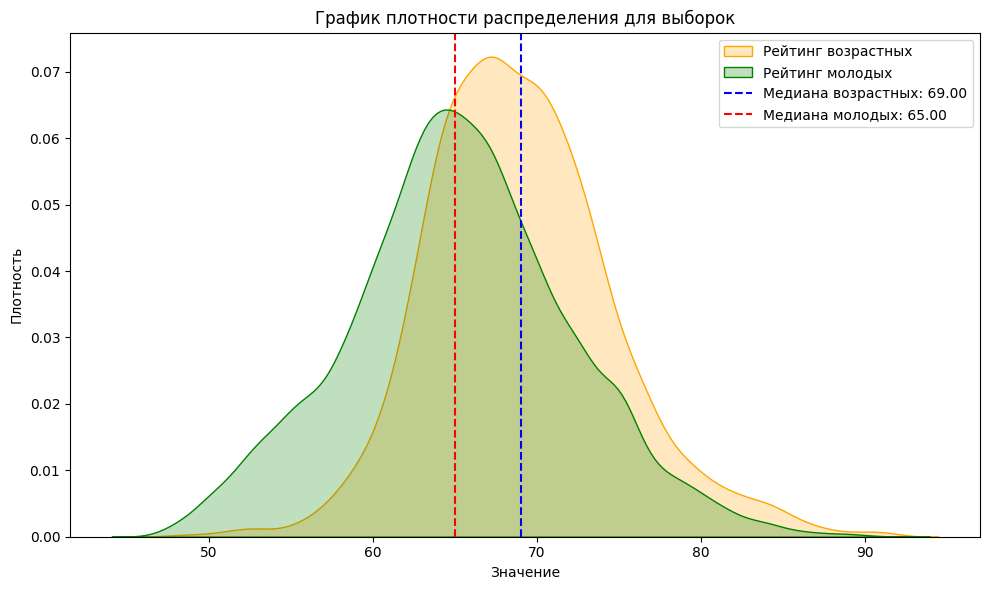

In [ ]:
import seaborn as sns

# Создаем данные для примера
old = data[data['Age'] > 30]['Overall']
young = data[data['Age'] <= 30]['Overall']

# Создаем подграфик
fig, ax = plt.subplots(figsize=(10, 6))

# График плотности распределения
sns.kdeplot(old, label='Рейтинг возрастных', fill=True, color='orange')

sns.kdeplot(young, label='Рейтинг молодых', fill=True, color='green')

ax.set_xlabel('Значение')
ax.set_ylabel('Плотность')
ax.set_title('График плотности распределения для выборок')
ax.legend()

# Добавляем медиану и другие параметры на график
median_old = np.median(old)
median_young = np.median(young)

ax.axvline(median_old, color='blue', linestyle='--', label=f'Медиана возрастных: {median_old:.2f}')
ax.axvline(median_young, color='red', linestyle='--', label=f'Медиана молодых: {median_young:.2f}')
ax.legend()

plt.tight_layout()
plt.show()

# Задание 3
 С помощью критерия независимости хи-квадрат проверить независимость рейтинга и национальности футболиста (формализовать Но и Н1, реализовать самостоятельно). Ту же самую задачу решить с помощью другого критерия (тоже формализовать гипотезы, но здесь можно воспользоваться готовой)

- Нулевая гипотеза $H_0$ = {Рейтинг и национальность независимы}
- Альтернативная гипотеза $H_1$ = { Рейтинг и национальность зависимы.}

Есть выборка (X1, Y1), . . . , (Xn, Yn) значений двух наблюдаемых совместно случайных величин X и Y в n независимых экспериментах.
Введём k интервалов группировки ∆1, . . . , ∆k для значений X и  ∇1, . . . , ∇k для значений Y

Посчитаем эмпирические частоты:
$v_{ij}$= общее число пар

$v_{.j}$ = число Yl, попавших в ∇j

$v_{i.}$ = число Xl, попавших в ∆i

Если гипотеза H0 верна, то теоретические вероятности попадания пары
(X, Y ) в любую из областей ∆i×∇j равны произведению вероятностей: для
всех i и j $p_{ij}$ = P((X, Y) ∈ ∆i × ∇j) = P(X ∈ ∆i) P(Y ∈ ∇j) = $p_{i}^x$ $p_{j}^y$

По ЗБЧ при n → ∞ $\frac{v_i}{n} → p_{i}^x ,
 \frac{v_j}{n} → p_{j}^y ,\frac{v_{ij}}{n} → p_{ij}$
 Поэтому большая разница между $\frac{v_{ij}}{n} и \frac{v_{j}}{n}*\frac{v_{i}}{n}$ служит основанием для отклонения гипотезы независимости.

 $$ρ(X,Y) = n\sum\sum\frac{(v_{ij}-v_{i}v_{j}/n)^2}{v_{i}v_{j}}$$

In [ ]:
#Интервалы
k = 10

hist, bins = np.histogram(data['Overall'], bins=k)
#таблица сопряженности между интервалами рейтинга и национальностями игроков
crosstab_table = pd.crosstab(pd.cut(data['Overall'], bins=k), data['Nationality'])

#массив эмпирических частот из таблицы сопряженности
v_i = crosstab_table.values
# массив сумм по строкам таблицы сопряженности (количество игроков в каждом интервале рейтинга).
rows = v_i.sum(axis=1)
# массив сумм по столбцам таблицы сопряженности (количество игроков каждой национальности).
cols = v_i.sum(axis=0)
n = v_i.sum()

#массив ожидаемых частот
np_i = np.outer(rows, cols) / n
chi2_stat = np.sum((v_i - np_i)**2 / np_i)

# Определение степеней свободы
df = (v_i.shape[0] - 1) * (v_i.shape[1] - 1)

epsilon = 0.05
chi_real = scipy.stats.chi2.ppf(1 - epsilon, k-1, 1)
print(f"Критическая точка со степенью свободы - {df} и уровнем значимости - {epsilon} : {c}")


if chi2_stat < c:
  print("Принимает нулевую гипотезу: Рейтинг и национальность независимы")
else:
  print("Принимает альтернативную гипотезу: Рейтинг и национальность зависимы")




Критическая точка со степенью свободы - 1431 и уровнем значимости - 0.05 : 12.591587243743977
Принимает альтернативную гипотезу: Рейтинг и национальность зависимы


Тест Краскела-Уоллиса

In [ ]:
from scipy.stats import kruskal

nationalities = data['Nationality'].unique()

h_statistic, p_value_kruskal = kruskal(*(data[data['Nationality'] == nat]['Overall'] for nat in nationalities))
h_statistic, p_value_kruskal

(3989.249084488498, 0.0)

Получается, нулевая гипотеза отвергнута и медианы рейтинга футболистов все-таки зависят от национальности.

Попарный тест Вилкоксона

In [ ]:
sel_size = 500

nationalities = [nat for nat in nationalities if sel_size < len(data[data['Nationality'] == nat])]
# display(nationalities)

wilcoxons = []
for i in range(len(nationalities) - 1):
    for j in range(i + 1, len(nationalities)):
        for _ in range(10):
            s1 = data[data['Nationality'] == nationalities[i]]['Overall'].sample(sel_size)
            s2 = data[data['Nationality'] == nationalities[j]]['Overall'].sample(sel_size)
            wilcoxons.append(wilcoxon(s1, s2)[1])

np.array(wilcoxons).mean()

0.04113197741504575

у рейтинга футболистов разных национальностей разные распределения

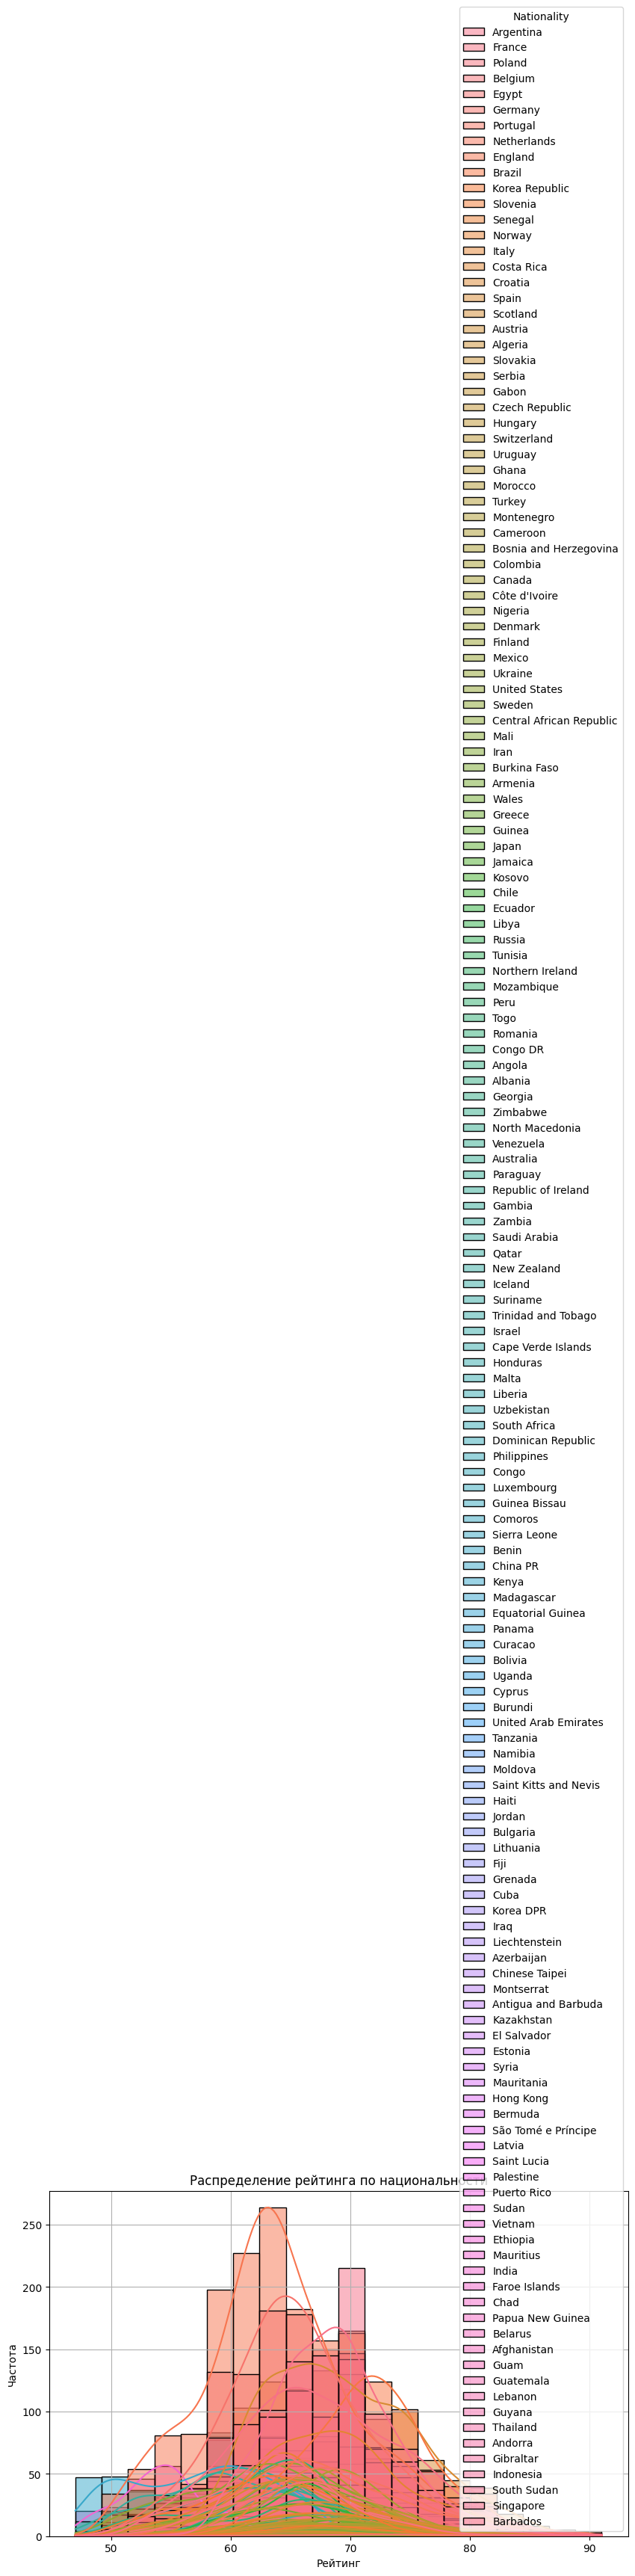

In [ ]:
dataset = pd.read_csv('/content/sample_data/fifa_players_stats.csv')

# Количество интервалов для гистограммы
num_intervals = 20

# Вычисляем гистограмму
hist, bins = np.histogram(dataset['Overall'], bins=num_intervals)

# Рисуем гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Overall', bins=bins, hue='Nationality', color ='pink', kde=True)
plt.title('Распределение рейтинга по национальности')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.grid(True)
plt.show()